In [1]:
# This file is associated with the book
# "Machine Learning Refined", Cambridge University Press, 2016.
# by Jeremy Watt, Reza Borhani, and Aggelos Katsaggelos.

import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from __future__ import division
import pylab
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split

C:\Users\dhana\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# load data
def load_data():
    data = np.array(np.genfromtxt('wavy_data.csv', delimiter=','))
    x = np.reshape(data[:,0],(np.size(data[:,0]),1))
    y = np.reshape(data[:,1],(np.size(data[:,1]),1))
    return x,y

x,y=load_data()
#kf = KFold(n_splits=3)
#kf.get_n_splits(x)
#KFold(n_splits=3)
#for train_index, test_index in kf.split(x):
#print("TRAIN:", train_index, "TEST:", test_index)
#X_train, X_test = x[0:20], x[20:30]
#Y_train, Y_test = y[0:20], y[20:30]
X_train ,X_test,Y_train,Y_test = train_test_split(x,y,train_size=0.67)  
#Y_train ,Y_test = train_test_split(y,train_size=0.67) 


    

In [3]:
def build_fourier(X_train,X_test,D):
    
    X_train = X_train.flatten()
    X_train.shape = (len(X_train),1)
    F = np.asarray(X_train)
    
    X_test = X_test.flatten()
    X_test.shape = (len(X_test),1)
    F1 = np.asarray(X_test)
   
    for i in range(1,D):    
        F=np.concatenate(np.cos(2*np.pi*i*X_train))
        F=np.concatenate(np.sin(2*np.pi*i*X_train))
        
        F1=np.concatenate(np.cos(2*np.pi*i*X_test))
        F1=np.concatenate(np.sin(2*np.pi*i*X_test))
    o = np.ones((1,np.shape(F)[0]))  
    F = np.vstack((o,F.T))
    o1= np.ones((1,np.shape(F1)[0])) 
    F1 = np.vstack((o1,F1.T))
    
    #F1=F1[:,1:]
    
    print(F.shape)
    print(F1.shape)
    return F,F1

In [4]:
# plot mse's over all D tested 
def plot_mse(mses,mses1,deg):
    plt.plot(np.arange(1,np.size(mses)+1),mses,'ro--')
    #plt.plot(mses,'ro--',color="black")
    plt.plot(np.arange(1,np.size(mses1)+1),mses1,'.-')
    #plt.plot(mses1,'.-')
    plt.title('MSE on entire dataset in D', fontsize=18)
    plt.xlabel('degree D', fontsize=18)
    plt.ylabel('MSE       ', fontsize=18)



In [5]:
# run over all the degrees, fit each models, and calculate errors
def try_all_degs(X_train,Y_train,X_test,Y_test,deg_range):
    # plot datapoints - one panel for each deg in deg_range
    fig = plt.figure(figsize = (8,4))
    #plot_data(x,y,deg_range)

    # generate nonlinear features
    mses = []
    mses1=[]
    for D in np.arange(0,len(deg_range)):
        # generate poly feature transformation
        F,F1 = build_fourier(X_train,X_test,deg_range[D])
        
        
        
        # get weights for current model
        
        temp = np.linalg.pinv(np.dot(F,F.T))
        w = np.dot(temp,np.dot(F,Y_train))
        MSE = np.linalg.norm(np.dot(F.T,w)-Y_train)/np.size(Y_train)
        mses.append(MSE)
        
       
        
        temp1 = np.linalg.pinv(np.dot(F1,F1.T))
        w = np.dot(temp1,np.dot(F1,Y_test))
        MSE1 = np.linalg.norm(np.dot(F1.T,w)-Y_test)/np.size(Y_test)
        mses1.append(MSE1)
       
  
    # make plot of mse's
    fig = plt.figure(figsize = (5,5))
    plot_mse(mses,mses1,deg_range)
    plt.show()

(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)
(2, 20)
(2, 10)


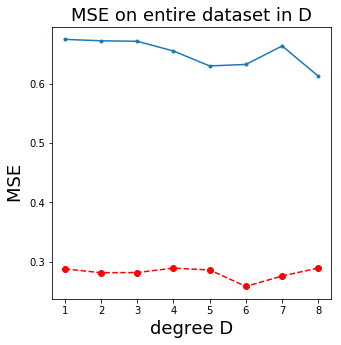

In [7]:
deg_range = [1,2,3,4,5,6,7,8]           # degree polys to try

# run all over degree range
try_all_degs(X_train,Y_train,X_test,Y_test,deg_range)